In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Graph

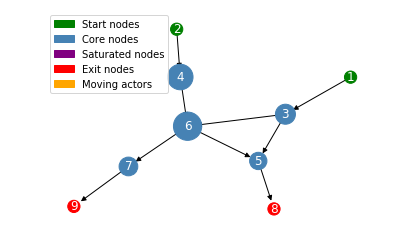

In [3]:
g = RandGraph(actors=1000, graph_type='medium')
g.plot()

## Action
At each step we will change the passthrough value of one intersection. Candidate intersections are:
* (3,5)
* (3,6)
* (6,5)
* (6,7)

The value is a modification ratio:
`[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]`

Thus the action space for this graph is `11 * 4 = 44`

## Find candidate intersections

In [4]:
print(g.graph.out_degree())

[(1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 0), (9, 0)]


In [7]:
origin_nodes = [tpl[0] for tpl in g.graph.out_degree() if tpl[1] > 1]
origin_nodes

[3, 6]

In [10]:
candidate_intersect = [tpl for tpl in g.graph.edges() if tpl[0] in origin_nodes]
candidate_intersect

[(3, 5), (3, 6), (6, 5), (6, 7)]

In [11]:
def find_candidate_intersections(g):
    origin_nodes = [tpl[0] for tpl in g.graph.out_degree() if tpl[1] > 1]
    candidate_intersect = [tpl for tpl in g.graph.edges() if tpl[0] in origin_nodes]
    return candidate_intersect

In [12]:
find_candidate_intersections(g)

[(3, 5), (3, 6), (6, 5), (6, 7)]

## sample action

In [13]:
values = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [43]:
idx = candidate_intersect.index(random.choice(candidate_intersect))
idx

1

In [51]:
a = np.zeros((1, len(candidate_intersect)))
a[:,idx] = 1.
a

array([[ 0.,  1.,  0.,  0.]])

In [18]:
random.choice(candidate_intersect), random.choice(values)

((6, 5), 0.1)

In [52]:
def sample():
    idx = candidate_intersect.index(random.choice(candidate_intersect))
    a = np.zeros((1, len(candidate_intersect)))
    a[:,idx] = 1.
    return a, random.choice(values)

In [70]:
a = sample()
a

(array([[ 0.,  0.,  1.,  0.]]), 0.2)

## get_edge

In [71]:
idx = np.where(a[0] == 1.)[1][0]

In [72]:
candidate_intersect[idx]

(6, 5)

In [74]:
def get_edge(a):
    idx = np.where(a[0] == 1.)[1][0]
    return candidate_intersect[idx], a[1]

In [75]:
get_edge(a)

((6, 5), 0.2)

## Model

`outputs = [next_q_vals]`

`inputs = [state, one_hot_action, value_action]`
